<a href="https://colab.research.google.com/github/zkaganz/Car-Price/blob/main/Car_Price_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/deneme/cars_2010_2020.csv")
df.head()

,Make,Model,Year,Engine Size (L),Fuel Type,Price (USD)
0,Volkswagen,Jetta,2010,4.2,Petrol,54073.09
1,Honda,Pilot,2017,4.2,Hybrid,44924.91
2,Nissan,Murano,2011,4.2,Hybrid,76963.44
3,Toyota,RAV4,2010,2.4,Petrol,30871.25
4,Nissan,Altima,2010,3.6,Petrol,72037.65


In [ ]:
fuel_counts = df['Fuel Type'].value_counts()

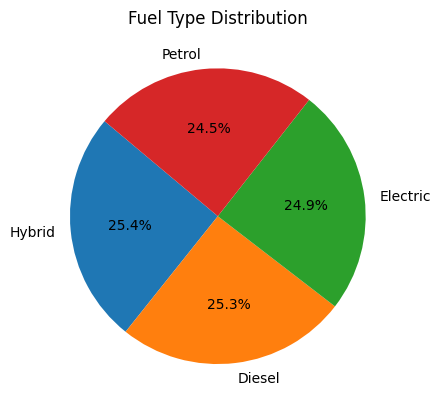

In [ ]:
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.show()

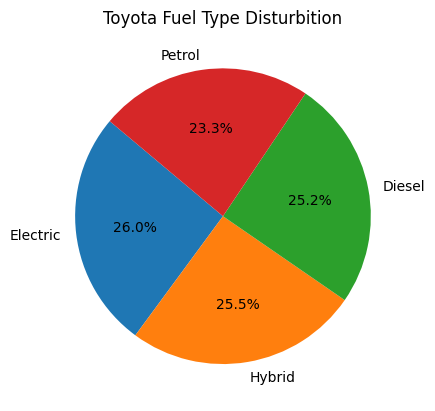

In [ ]:
import matplotlib.pyplot as plt
toyota_fuel = df[df['Make'] == 'Toyota']['Fuel Type'].value_counts()
plt.pie(toyota_fuel, labels=toyota_fuel.index, autopct='%1.1f%%', startangle=140)
plt.title('Toyota Fuel Type Disturbition')
plt.show()

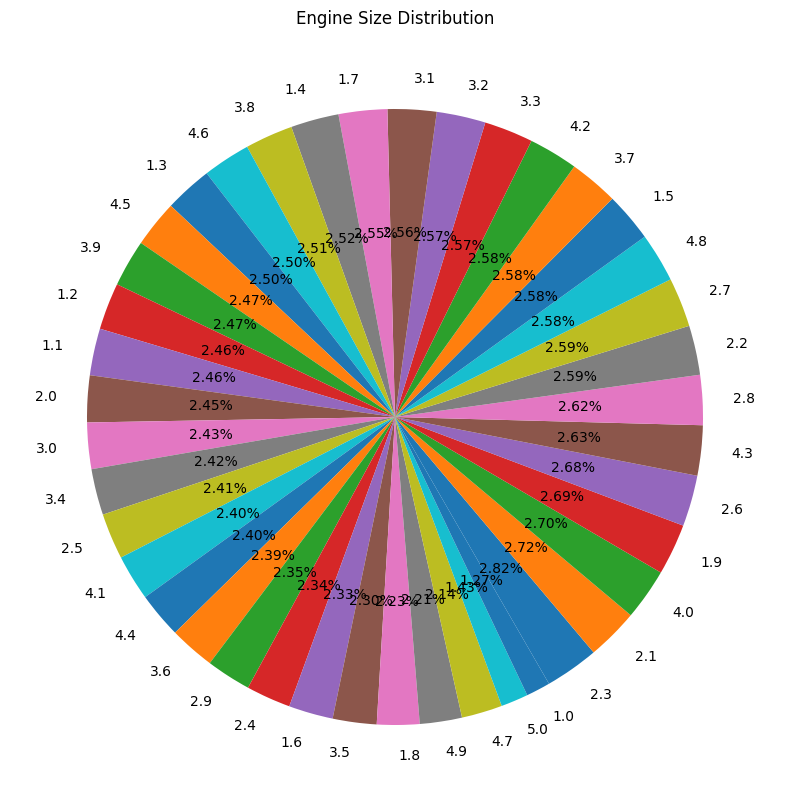

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df['Engine Size (L)'].value_counts(),labels=df["Engine Size (L)"].value_counts().index,autopct='%1.2f%%',startangle=300)

plt.title('Engine Size Distribution')
plt.show()


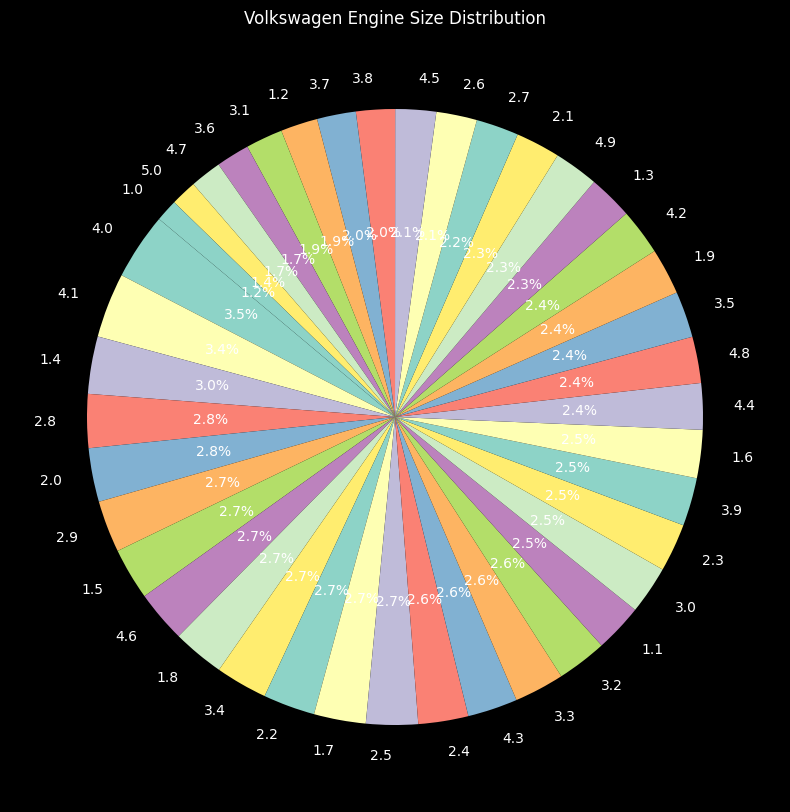

In [ ]:
from matplotlib import style
style.use("dark_background")
volkswagen_engines = df[df['Make'] == 'Volkswagen']['Engine Size (L)'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(volkswagen_engines, labels=volkswagen_engines.index, autopct='%1.1f%%', startangle=140)
plt.title('Volkswagen Engine Size Distribution')
plt.show()

In [ ]:
average_prices_by_year = df.groupby('Year')['Price (USD)'].mean().reset_index()

print(average_prices_by_year)

    Year   Price (USD)
0   2010  48068.359304
1   2011  47105.496257
2   2012  47587.351789
3   2013  47073.227585
4   2014  47090.387933
5   2015  47621.023011
6   2016  47586.257469
7   2017  47225.017553
8   2018  47682.285535
9   2019  46680.811548
10  2020  47620.303214


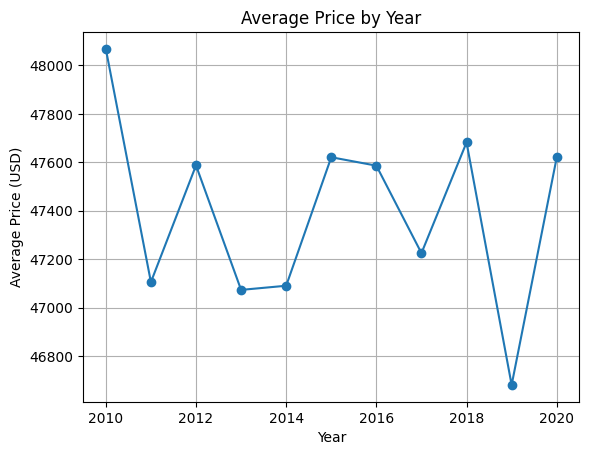

In [ ]:
average_prices_by_year = df.groupby('Year')['Price (USD)'].mean().reset_index()

plt.plot(average_prices_by_year['Year'], average_prices_by_year['Price (USD)'], marker='o')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)


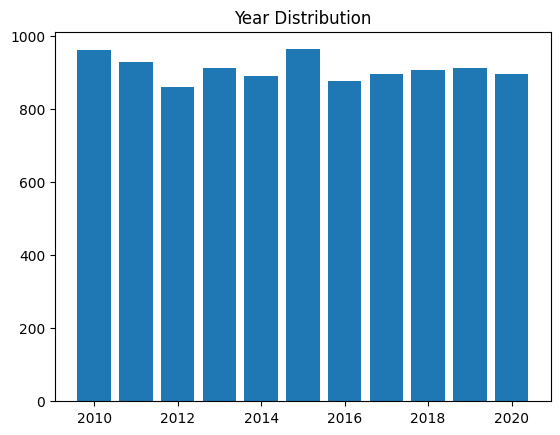

In [ ]:
plt.bar(df["Year"].value_counts().index,df["Year"].value_counts())
plt.title("Year Distribution")
plt.show()

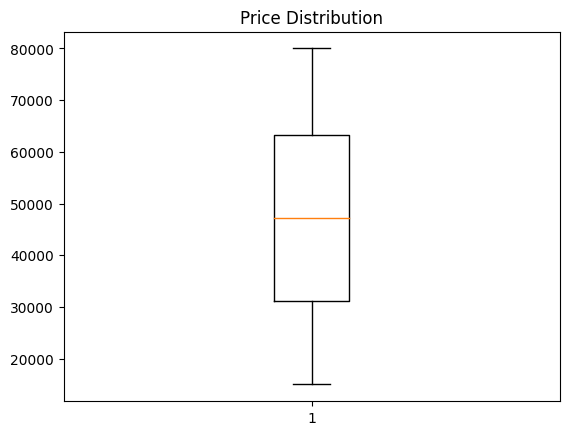

In [ ]:
plt.boxplot(df['Price (USD)'])
plt.title('Price Distribution')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
label_encoders = {}
for column in ['Make', 'Model', 'Fuel Type']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
X = df.drop('Price (USD)', axis=1)
y = df['Price (USD)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 16236.676409149315
MSE: 353508280.6535358
RMSE: 18801.815887130044


In [ ]:
new_car = {
    'Make': 'Toyota',
    'Model': 'Camry',
    'Year': 2023,
    'Engine Size (L)': 2.5,
    'Fuel Type': 'Petrol'
}

# Yeni arabayı sayısal verilere çevirme
for column in ['Make', 'Model', 'Fuel Type']:
    if new_car[column] in label_encoders[column].classes_:
        new_car[column] = label_encoders[column].transform([new_car[column]])[0]
    else:
        # Eğer yeni değeri eğitim setinde yoksa, yeni bir sınıf olarak eklenir
        label_encoders[column].classes_ = list(label_encoders[column].classes_) + [new_car[column]]
        new_car[column] = label_encoders[column].transform([new_car[column]])[0]

# Yeni arabayı bir DataFrame'e dönüştürme
new_car_df = pd.DataFrame([new_car])

# Tahmin yapma
predicted_price = model.predict(new_car_df)[0]
print(f"Tahmin edilen fiyat: ${predicted_price:.2f}")

Tahmin edilen fiyat: $47500.99


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=44)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 16897.549673803172
MSE: 397472617.94993174
RMSE: 19936.715324996036


In [ ]:
predicted_price2 = model2.predict(new_car_df)[0]
print(f"Tahmin edilen fiyat: ${predicted_price2:.2f}")

Tahmin edilen fiyat: $50187.96
